In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
import scipy.stats as stats
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
solar = pd.read_csv("Solar_Power_Generation.csv")
solar

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069
...,...,...,...,...,...,...,...,...,...,...
100452,0.161450,50,28,18.7,3,10.0,72,21.0,30.05,19435
100453,0.457990,50,28,18.7,3,10.0,72,21.0,29.99,4842
100454,0.754530,50,28,18.7,2,10.0,77,21.0,29.98,0
100455,1.051071,50,28,18.7,2,10.0,80,11.0,30.00,0


In [5]:
solar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100457 entries, 0 to 100456
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   distance-to-solar-noon       100457 non-null  float64
 1   temperature                  100457 non-null  int64  
 2   wind-direction               100457 non-null  int64  
 3   wind-speed                   100457 non-null  float64
 4   sky-cover                    100457 non-null  int64  
 5   visibility                   100457 non-null  float64
 6   humidity                     100457 non-null  int64  
 7   average-wind-speed-(period)  100422 non-null  float64
 8   average-pressure-(period)    100457 non-null  float64
 9   power-generated              100457 non-null  int64  
dtypes: float64(5), int64(5)
memory usage: 7.7 MB


In [7]:
solar[solar.duplicated(keep=False)]

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069
...,...,...,...,...,...,...,...,...,...,...
100452,0.161450,50,28,18.7,3,10.0,72,21.0,30.05,19435
100453,0.457990,50,28,18.7,3,10.0,72,21.0,29.99,4842
100454,0.754530,50,28,18.7,2,10.0,77,21.0,29.98,0
100455,1.051071,50,28,18.7,2,10.0,80,11.0,30.00,0


In [9]:
solar[solar["power-generated"]== 0]

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
7,0.759640,69,28,7.5,0,10.0,49,6.0,29.86,0
8,0.862113,72,29,6.8,0,10.0,67,6.0,29.86,0
9,0.630155,72,29,6.8,0,10.0,49,0.0,29.87,0
...,...,...,...,...,...,...,...,...,...,...
100448,1.024712,50,28,18.7,4,10.0,71,16.0,30.15,0
100449,0.728171,50,28,18.7,3,10.0,69,21.0,30.11,0
100454,0.754530,50,28,18.7,2,10.0,77,21.0,29.98,0
100455,1.051071,50,28,18.7,2,10.0,80,11.0,30.00,0


In [11]:
solar1 = solar.drop_duplicates(keep='first')
solar1

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069
...,...,...,...,...,...,...,...,...,...,...
2915,0.166453,63,27,13.9,4,10.0,75,10.0,29.93,6995
2916,0.064020,63,27,13.9,1,10.0,66,15.0,29.91,29490
2917,0.294494,63,27,13.9,2,10.0,68,21.0,29.88,17257
2918,0.524968,63,27,13.9,2,10.0,81,17.0,29.87,677


In [13]:
# Print unique values in each column

for i in range(len(solar1.columns)):
    print(solar1.columns[i],":",len(solar1.iloc[:,i].unique()))

distance-to-solar-noon : 2660
temperature : 37
wind-direction : 35
wind-speed : 159
sky-cover : 5
visibility : 17
humidity : 75
average-wind-speed-(period) : 33
average-pressure-(period) : 90
power-generated : 1529


In [15]:
solar1.isnull().sum()

distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    1
average-pressure-(period)      0
power-generated                0
dtype: int64

In [17]:
solar1.dropna(inplace =True)
solar1.isnull().sum()

C:\Users\bannu\AppData\Local\Temp\ipykernel_17436\2012567920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solar1.dropna(inplace =True)


distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    0
average-pressure-(period)      0
power-generated                0
dtype: int64

In [19]:
solar1

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069
...,...,...,...,...,...,...,...,...,...,...
2915,0.166453,63,27,13.9,4,10.0,75,10.0,29.93,6995
2916,0.064020,63,27,13.9,1,10.0,66,15.0,29.91,29490
2917,0.294494,63,27,13.9,2,10.0,68,21.0,29.88,17257
2918,0.524968,63,27,13.9,2,10.0,81,17.0,29.87,677


In [21]:
solar1["sky-cover"].value_counts()

sky-cover
1    776
4    598
3    580
0    518
2    447
Name: count, dtype: int64

In [23]:
solar1["wind-direction"].value_counts()

wind-direction
27    528
29    496
28    464
30    288
26    216
32     88
14     64
31     56
20     56
13     48
23     40
17     40
18     40
15     40
21     40
16     40
12     39
10     32
22     32
7      24
4      24
3      24
6      24
24     24
9      24
33     16
34     16
36     16
25     16
19     16
5      16
1       8
11      8
8       8
2       8
Name: count, dtype: int64

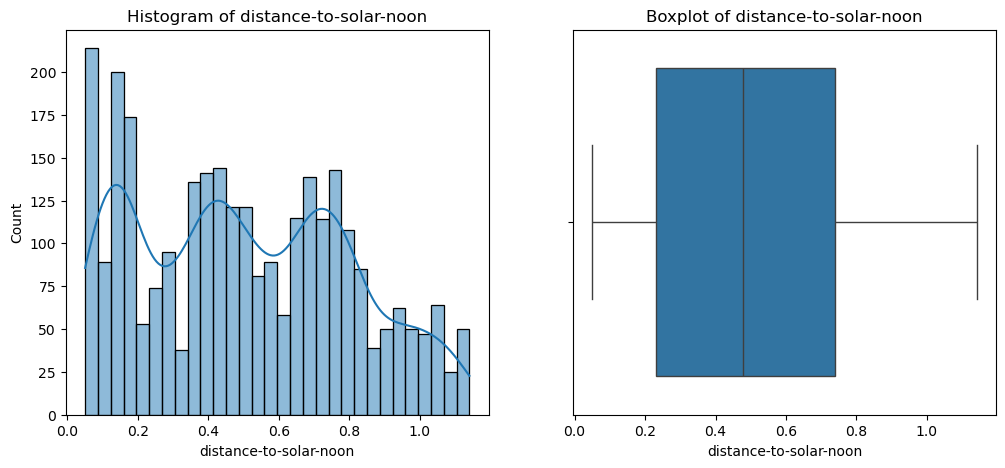

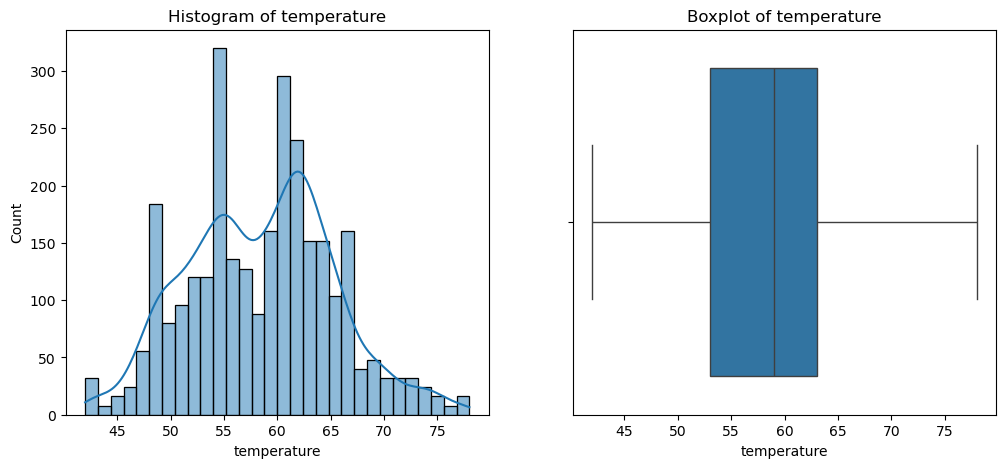

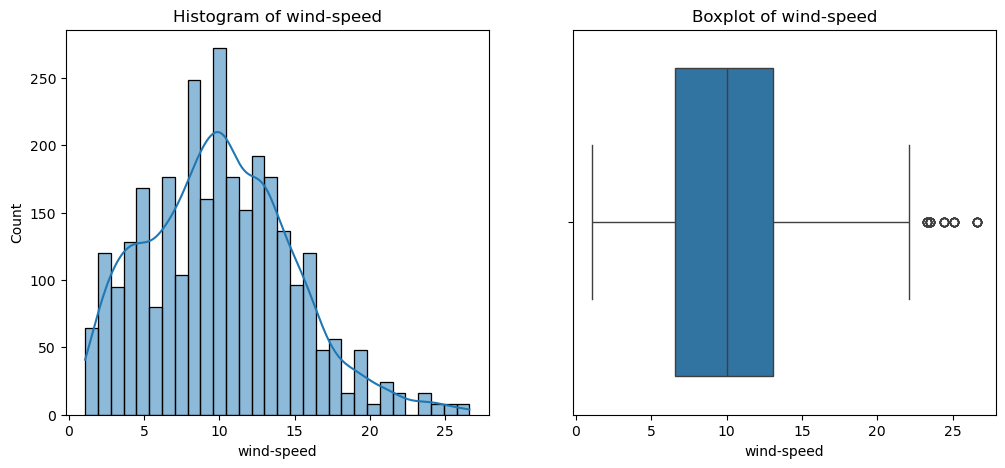

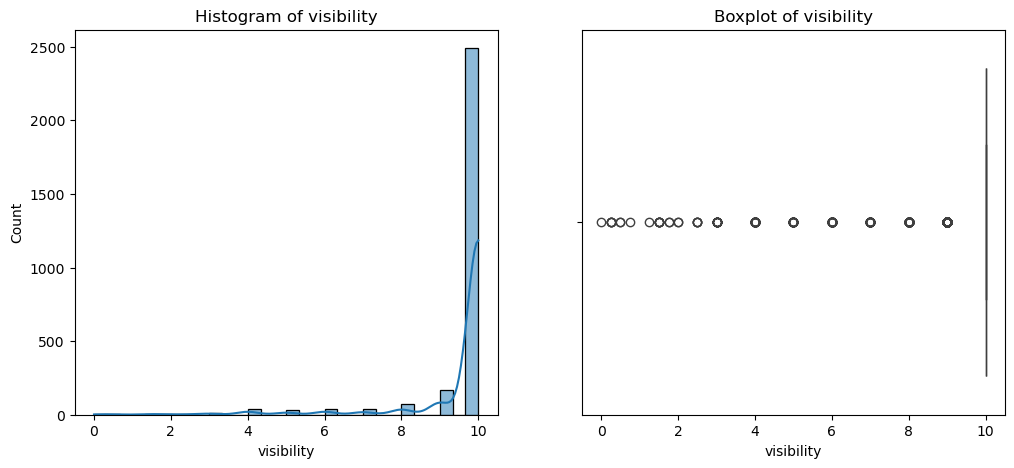

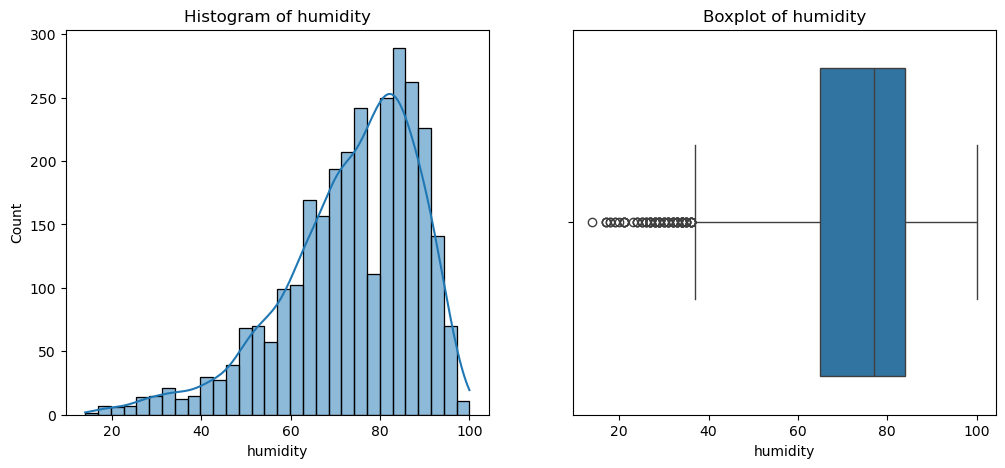

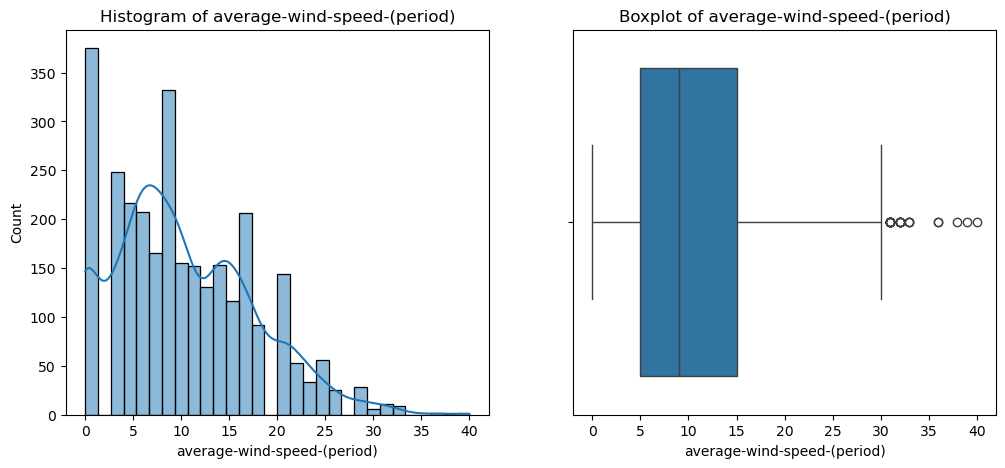

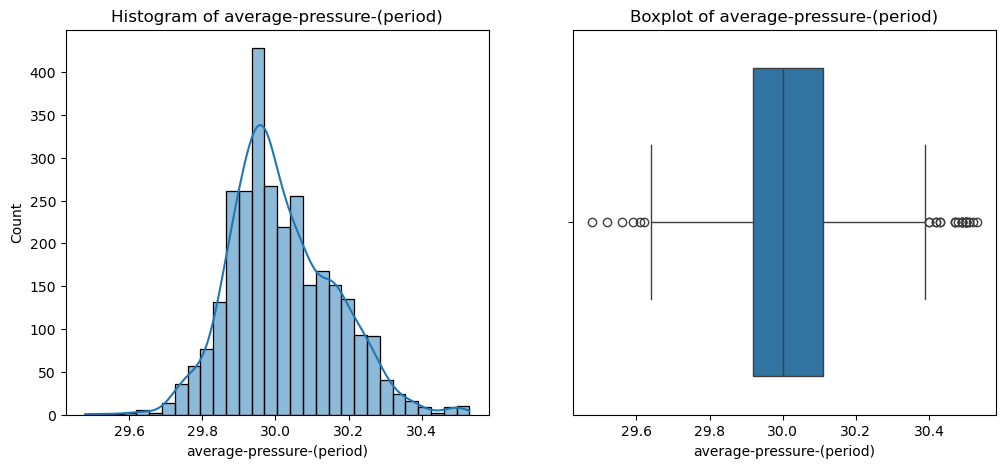

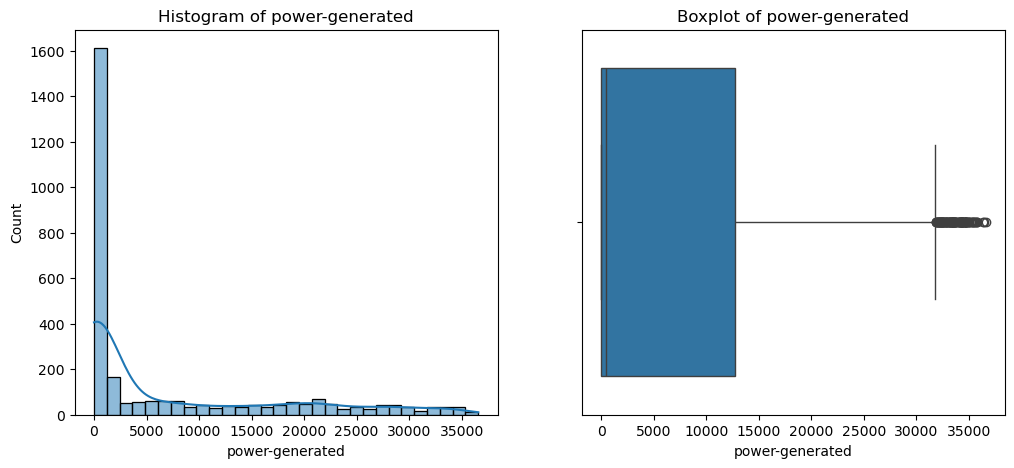

In [25]:
continuous_columns = ['distance-to-solar-noon', 'temperature', 'wind-speed', 
                      'visibility', 'humidity', 'average-wind-speed-(period)', 
                      'average-pressure-(period)', 'power-generated']

for col in continuous_columns:
    plt.figure(figsize=(12,5))
    
    plt.subplot(1, 2, 1)
    sns.histplot(solar1[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=solar1[col])
    plt.title(f'Boxplot of {col}')
    
    plt.show()


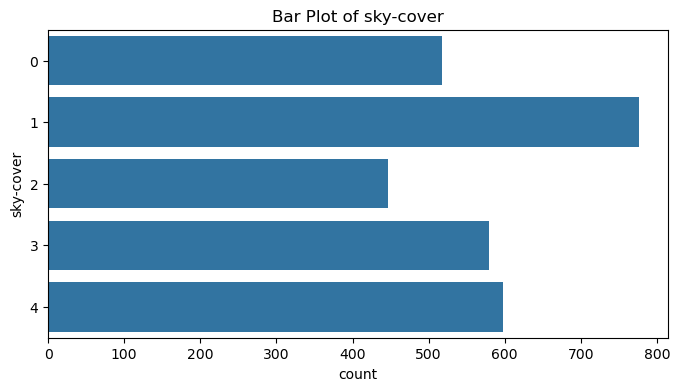

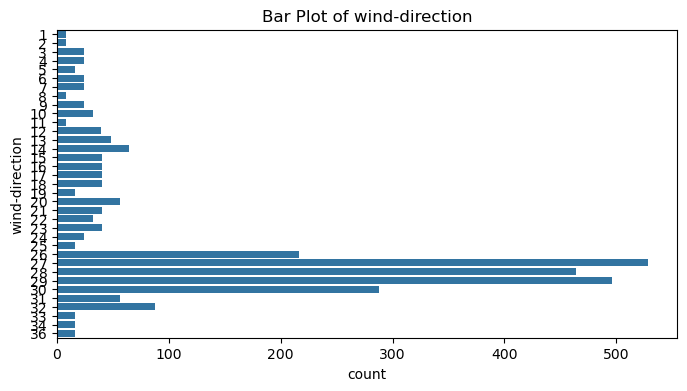

In [26]:
categorical_columns = ['sky-cover', 'wind-direction']

for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=solar1[col])
    plt.title(f'Bar Plot of {col}')
    plt.show()


In [27]:
solar1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 2919
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   distance-to-solar-noon       2919 non-null   float64
 1   temperature                  2919 non-null   int64  
 2   wind-direction               2919 non-null   int64  
 3   wind-speed                   2919 non-null   float64
 4   sky-cover                    2919 non-null   int64  
 5   visibility                   2919 non-null   float64
 6   humidity                     2919 non-null   int64  
 7   average-wind-speed-(period)  2919 non-null   float64
 8   average-pressure-(period)    2919 non-null   float64
 9   power-generated              2919 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 250.9 KB


In [28]:
solar1[solar1["power-generated"]== 0]

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
7,0.759640,69,28,7.5,0,10.0,49,6.0,29.86,0
8,0.862113,72,29,6.8,0,10.0,67,6.0,29.86,0
9,0.630155,72,29,6.8,0,10.0,49,0.0,29.87,0
...,...,...,...,...,...,...,...,...,...,...
2905,0.625798,61,27,15.8,1,10.0,90,13.0,29.84,0
2911,0.753512,61,27,15.8,4,10.0,90,13.0,29.87,0
2912,0.857875,63,27,13.9,4,10.0,93,11.0,29.86,0
2913,0.627401,63,27,13.9,4,10.0,90,11.0,29.86,0


#### Observations
- There are many y values (1320) with zero power generated.

In [30]:
# Rename columns for clarity and convenience

solar1.rename(columns={
    "distance-to-solar-noon": "solar_noon_dist",
    "temperature": "temperature",
    "wind-direction": "wind_dir",
    "wind-speed": "wind_speed",
    "sky-cover": "sky_cover",
    "visibility": "visibility",
    "humidity": "humidity",
    "average-wind-speed-(period)": "avg_wind_speed",
    "average-pressure-(period)": "avg_pressure",
    "power-generated": "power_generated"
}, inplace=True)

# Optional: preview the cleaned dataset
print(solar1.head())


   solar_noon_dist  temperature  wind_dir  wind_speed  sky_cover  visibility  \
0         0.859897           69        28         7.5          0        10.0   
1         0.628535           69        28         7.5          0        10.0   
2         0.397172           69        28         7.5          0        10.0   
3         0.165810           69        28         7.5          0        10.0   
4         0.065553           69        28         7.5          0        10.0   

   humidity  avg_wind_speed  avg_pressure  power_generated  
0        75             8.0         29.82                0  
1        77             5.0         29.85                0  
2        70             0.0         29.89             5418  
3        33             0.0         29.91            25477  
4        21             3.0         29.89            30069  


C:\Users\bannu\AppData\Local\Temp\ipykernel_17436\1840830478.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solar1.rename(columns={


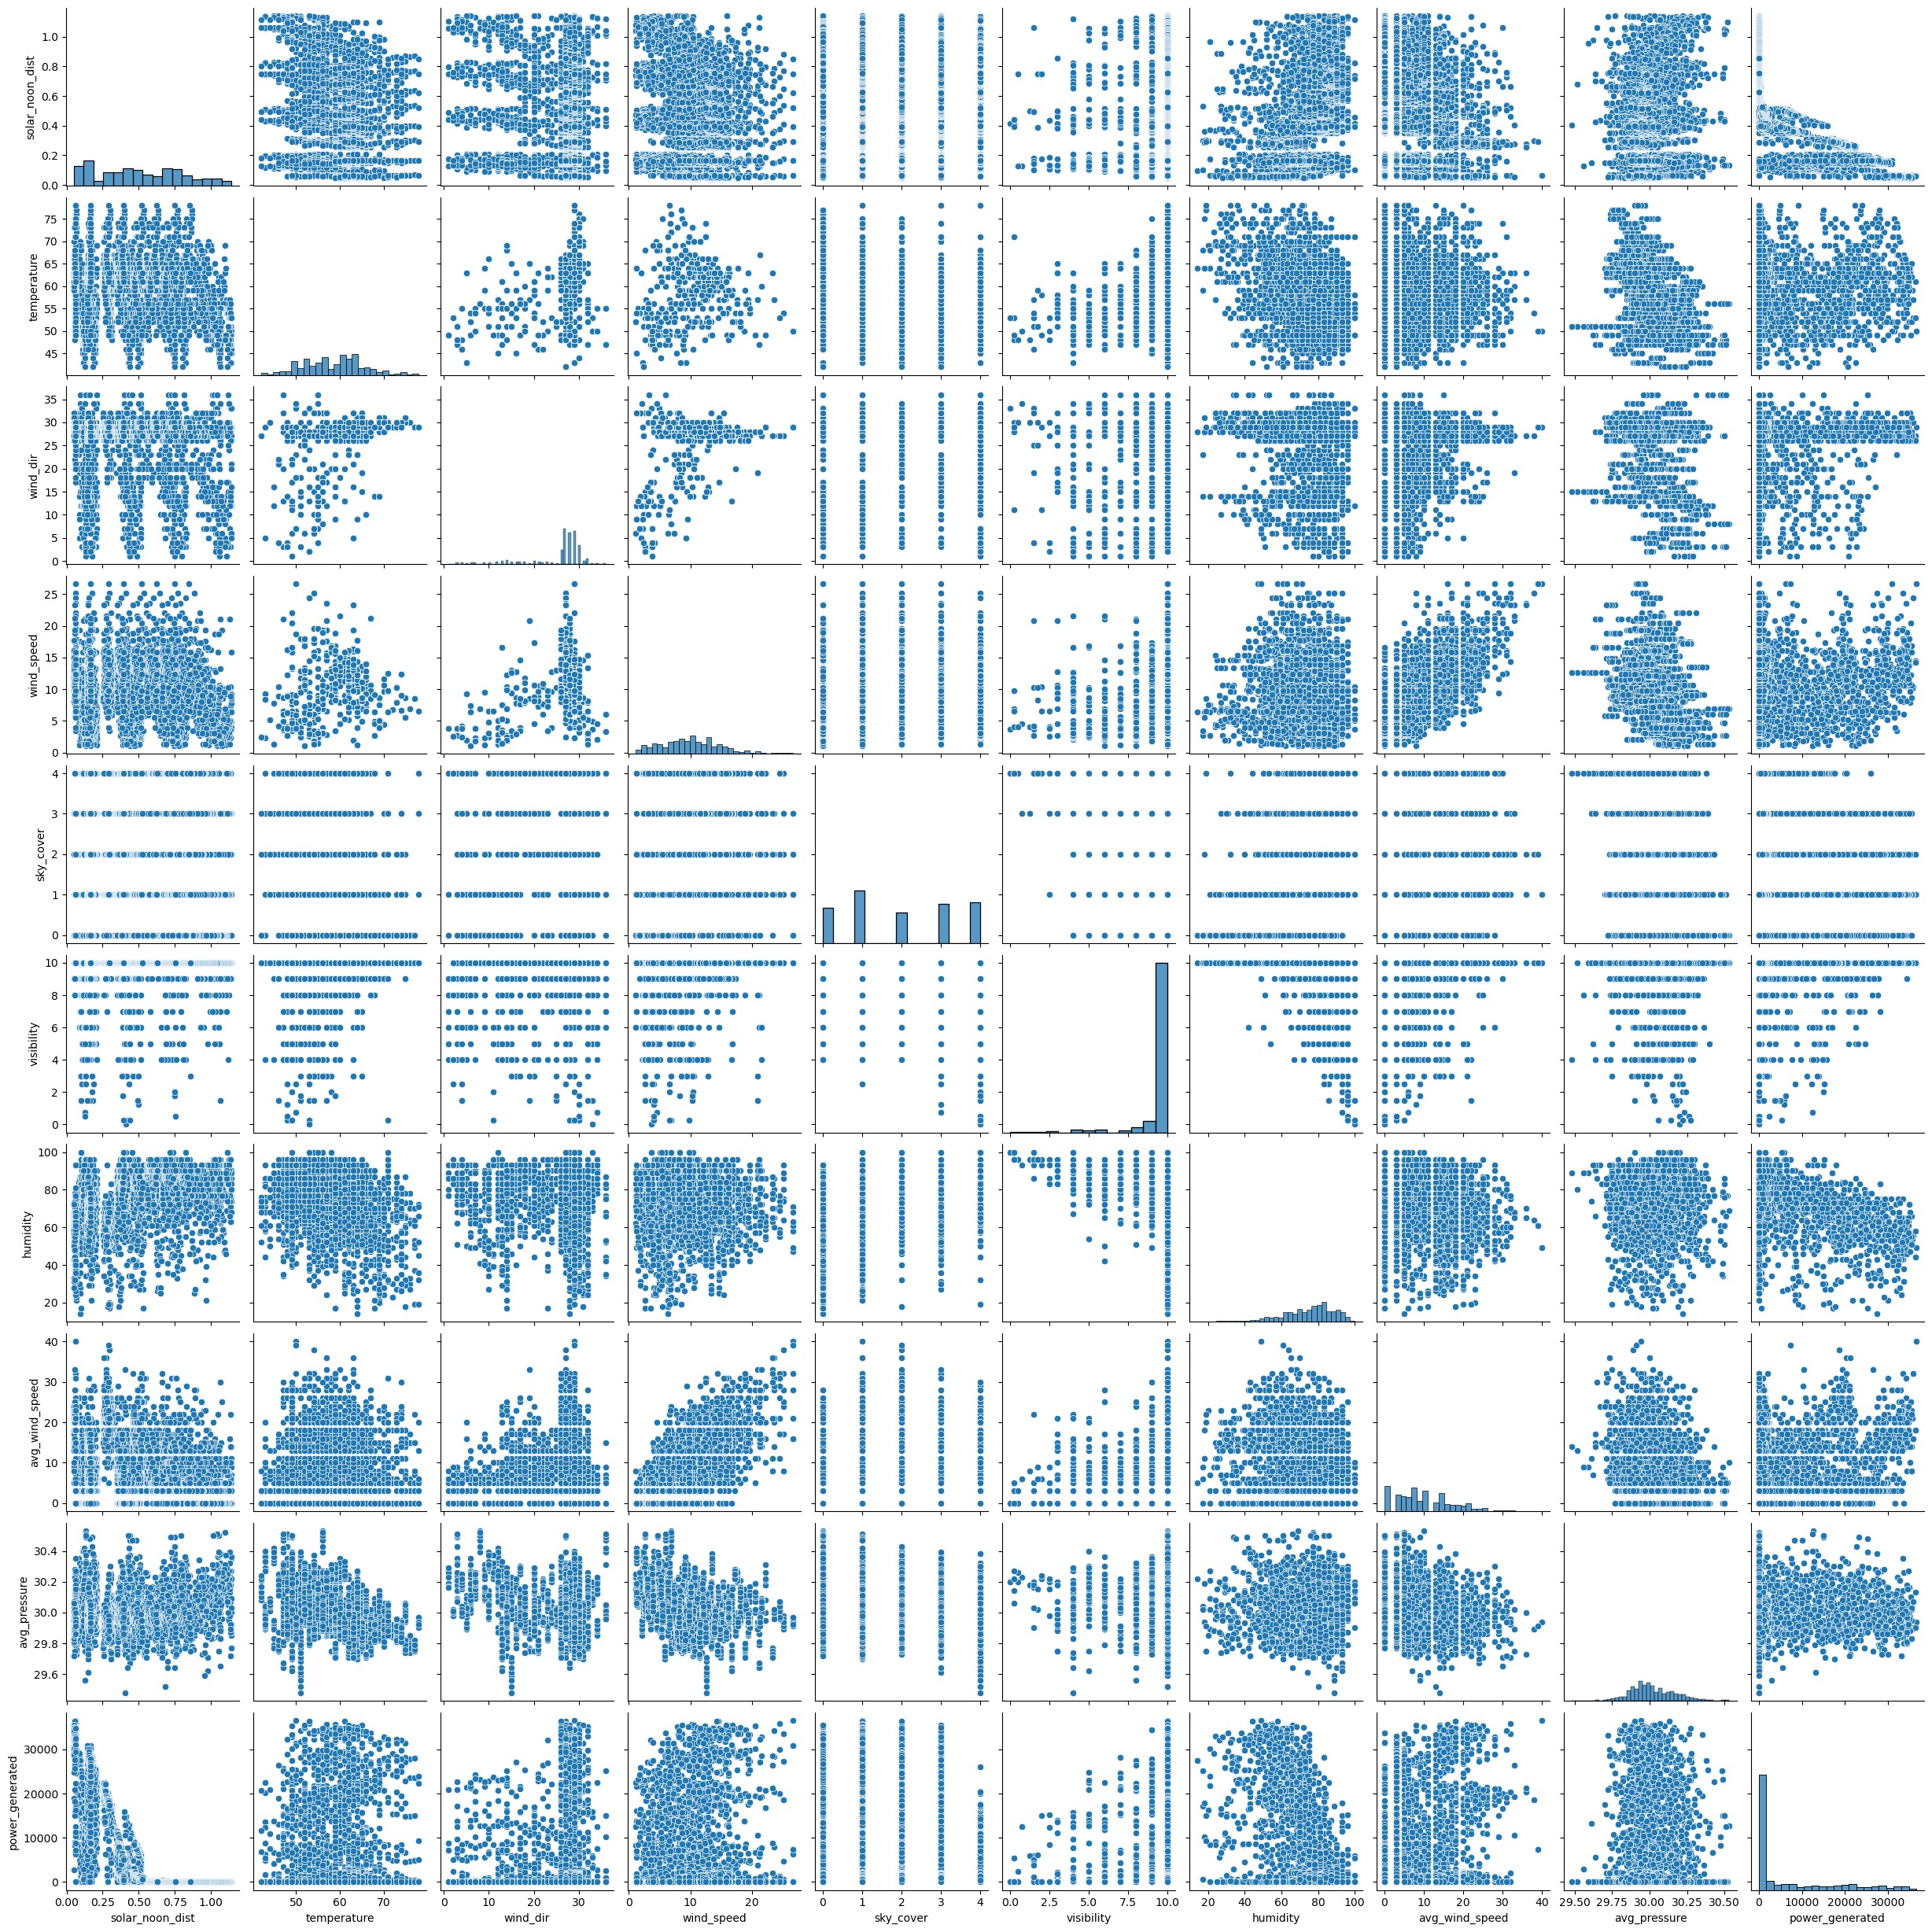

In [31]:
sns.pairplot(data =solar1)

In [32]:
solar1.corr()

,solar_noon_dist,temperature,wind_dir,wind_speed,sky_cover,visibility,humidity,avg_wind_speed,avg_pressure,power_generated
solar_noon_dist,1.000000,-0.145235,-0.118293,-0.145301,-0.015183,0.065541,0.369278,-0.214891,0.082633,-0.746825
temperature,-0.145235,1.000000,0.342216,0.096194,-0.230673,0.194354,-0.221440,0.054546,-0.435728,0.132155
wind_dir,-0.118293,0.342216,1.000000,0.340899,-0.137217,0.201546,-0.095053,0.229844,-0.271973,0.146463
wind_speed,-0.145301,0.096194,0.340899,1.000000,0.107840,0.183281,0.005676,0.673626,-0.379447,0.142366
sky_cover,-0.015183,-0.230673,-0.137217,0.107840,1.000000,-0.224131,0.394722,0.044301,-0.091531,-0.187248
visibility,0.065541,0.194354,0.201546,0.183281,-0.224131,1.000000,-0.290180,0.143621,-0.104273,0.075841
humidity,0.369278,-0.221440,-0.095053,0.005676,0.394722,-0.290180,1.000000,-0.218042,0.017987,-0.522445
avg_wind_speed,-0.214891,0.054546,0.229844,0.673626,0.044301,0.143621,-0.218042,1.000000,-0.293457,0.278174
avg_pressure,0.082633,-0.435728,-0.271973,-0.379447,-0.091531,-0.104273,0.017987,-0.293457,1.000000,-0.036553
power_generated,-0.746825,0.132155,0.146463,0.142366,-0.187248,0.075841,-0.522445,0.278174,-0.036553,1.000000


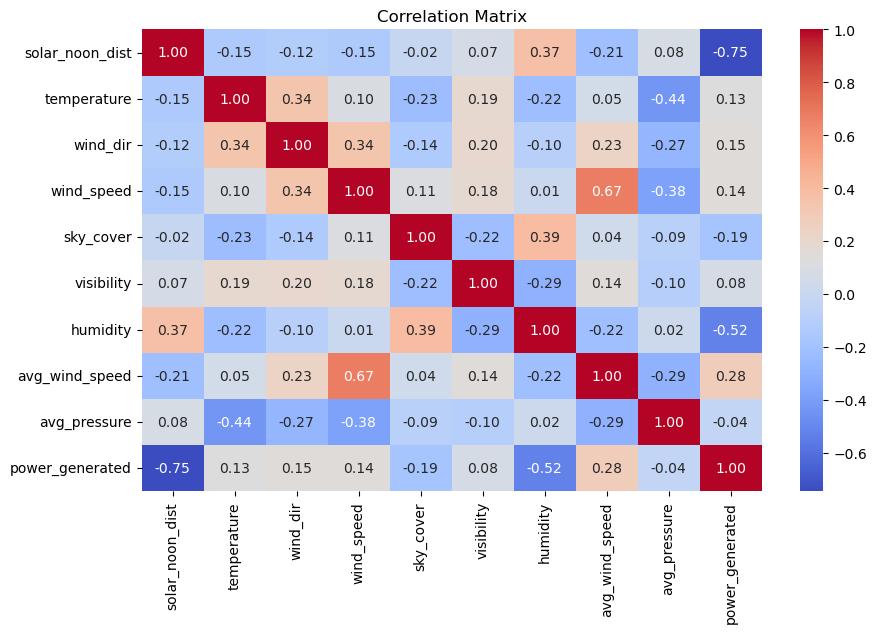

In [33]:
# Correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(solar1.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [34]:
# Separate features and target
X = solar1.drop(columns=['power_generated'])
y = solar1['power_generated']

# Add constant for intercept
X_with_const = sm.add_constant(X)

# Fit model
model1 = sm.OLS(y, X_with_const).fit()

# Show model summary
model1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        power_generated   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     598.3
Date:                Thu, 27 Mar 2025   Prob (F-statistic):               0.00
Time:                        17:47:31   Log-Likelihood:                -29587.
No. Observations:                2919   AIC:                         5.919e+04
Df Residuals:                    2909   BIC:                         5.925e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -3.45e+04   3.01e+04     -1.146      0.252   -9.35e+04    2.45e+04
solar_noon_dist -2.269e+04    434.409    -52.225      0.000   -2.35e+04   -2.18e+04
temperature       -65.6543     20.381     -3.221      0.001    -105.617     -25.691
wind_dir           45.0021     18.710      2.405      0.016       8.316      81.688
wind_speed        -13.5493     35.046     -0.387      0.699     -82.267      55.168
sky_cover        -837.2006     93.212     -8.982      0.000   -1019.970    -654.432
visibility        174.2112     91.566      1.903      0.057      -5.329     353.752
humidity         -146.1231      9.772    -14.954      0.000    -165.283    -126.963
avg_wind_speed    143.3258     22.405      6.397      0.000      99.395     187.256
avg_pressure     2166.7590    978.957      2.213      0.027     247.241    4086.277
==============================================================================
Omnibus:                       10.363   Durbin-Watson:                   1.239
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               10.338
Skew:                           0.141   Prob(JB):                      0.00569
Kurtosis:                       3.071   Cond. No.                     2.76e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.76e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
X = solar1.drop(columns=['wind_speed'])
y = solar1['power_generated']

X_with_const = sm.add_constant(X)

model1 = sm.OLS(y, X_with_const).fit()
model1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        power_generated   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.032e+32
Date:                Thu, 27 Mar 2025   Prob (F-statistic):               0.00
Time:                        17:47:32   Log-Likelihood:                 70837.
No. Observations:                2919   AIC:                        -1.417e+05
Df Residuals:                    2909   BIC:                        -1.416e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -2.91e-11   3.39e-11     -0.860      0.390   -9.55e-11    3.73e-11
solar_noon_dist -4.093e-12    6.9e-13     -5.928      0.000   -5.45e-12   -2.74e-12
temperature     -5.684e-14   2.33e-14     -2.436      0.015   -1.03e-13   -1.11e-14
wind_dir         5.329e-14   2.09e-14      2.546      0.011    1.22e-14    9.43e-14
sky_cover         4.69e-13   1.08e-13      4.338      0.000    2.57e-13    6.81e-13
visibility      -3.411e-13   1.03e-13     -3.298      0.001   -5.44e-13   -1.38e-13
humidity        -1.421e-14   1.13e-14     -1.254      0.210   -3.64e-14    8.02e-15
avg_wind_speed           0   2.02e-14          0      1.000   -3.97e-14    3.97e-14
avg_pressure     1.364e-12    1.1e-12      1.241      0.215   -7.92e-13    3.52e-12
power_generated     1.0000   2.12e-17   4.71e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                      258.731   Durbin-Watson:                   0.185
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              309.003
Skew:                          -0.774   Prob(JB):                     7.96e-68
Kurtosis:                       2.624   Cond. No.                     3.25e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.25e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
X = solar1.drop(columns=['power_generated', 'wind_speed'])  
Y = solar1['power_generated']  

X = sm.add_constant(X)  
model = sm.OLS(Y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        power_generated   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     673.2
Date:                Thu, 27 Mar 2025   Prob (F-statistic):               0.00
Time:                        17:47:32   Log-Likelihood:                -29587.
No. Observations:                2919   AIC:                         5.919e+04
Df Residuals:                    2910   BIC:                         5.925e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -3.67e+04   2.96e+04     

In [42]:
# Predict on test data and find the RMSE value
# Predict and compute MSE
y_pred = model1.predict(X_with_const)
mse1 = mean_squared_error(y, y_pred)
print("RMSE (Model1): ", np.sqrt(mse1))

RMSE (Model1):  6.990808762533637e-12


In [43]:
# Ensure X is defined (without the target column)
X = solar1.drop(columns=['power_generated'])

# Add constant for intercept (required for VIF computation)
X_with_const = sm.add_constant(X)

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

print(vif_data)

           Feature           VIF
0            const  70720.937628
1  solar_noon_dist      1.307262
2      temperature      1.516349
3         wind_dir      1.304085
4       wind_speed      2.240697
5        sky_cover      1.351085
6       visibility      1.245484
7         humidity      1.691701
8   avg_wind_speed      2.063787
9     avg_pressure      1.506847


#### Observation:
- The vif values confirms that there is no multi collinearity
- all are below 10 and that indicates good to keep

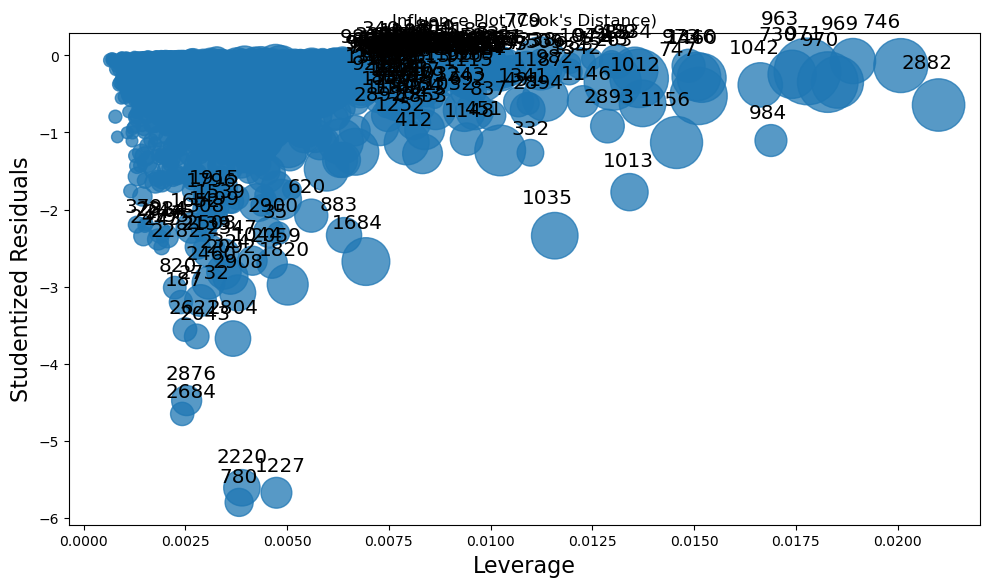

[4,
 12,
 339,
 340,
 411,
 412,
 451,
 459,
 491,
 612,
 620,
 675,
 676,
 692,
 730,
 731,
 732,
 746,
 747,
 748,
 755,
 756,
 772,
 779,
 803,
 819,
 860,
 883,
 884,
 923,
 963,
 964,
 969,
 970,
 971,
 972,
 973,
 979,
 980,
 985,
 987,
 1012,
 1013,
 1027,
 1028,
 1035,
 1042,
 1043,
 1052,
 1060,
 1108,
 1115,
 1116,
 1156,
 1157,
 1187,
 1188,
 1196,
 1219,
 1228,
 1243,
 1244,
 1251,
 1252,
 1292,
 1300,
 1412,
 1428,
 1436,
 1460,
 1484,
 1500,
 1508,
 1516,
 1524,
 1532,
 1540,
 1548,
 1580,
 1588,
 1604,
 1627,
 1628,
 1629,
 1636,
 1676,
 1684,
 1692,
 1700,
 1708,
 1709,
 1716,
 1724,
 1740,
 1780,
 1788,
 1803,
 1804,
 1811,
 1812,
 1820,
 1827,
 1828,
 1834,
 1835,
 1853,
 1868,
 1883,
 1884,
 1891,
 1892,
 1900,
 1908,
 1915,
 1916,
 1924,
 1931,
 1932,
 1988,
 1996,
 2004,
 2012,
 2020,
 2021,
 2028,
 2035,
 2036,
 2042,
 2044,
 2052,
 2068,
 2084,
 2092,
 2100,
 2108,
 2132,
 2140,
 2148,
 2196,
 2204,
 2220,
 2228,
 2236,
 2244,
 2260,
 2268,
 2284,
 2292,
 2316,
 

In [45]:
# Plot the influence plot
fig, ax = plt.subplots(figsize=(10, 6))
sm.graphics.influence_plot(model1, ax=ax, criterion="cooks")
plt.title("Influence Plot (Cook's Distance)")
plt.tight_layout()
plt.show()

# Identify potential influencers based on Cook's distance
influence = model1.get_influence()
cooks_d = influence.cooks_distance[0]

# Set a threshold for high influence points (commonly 4/n)
n = len(solar1)
threshold = 4 / n

# Get indices of influential points
influential_points = solar1.index[cooks_d > threshold].tolist()
influential_points


In [46]:
# Remove influential rows
df_cleaned = solar1.drop(index=influential_points)

# Separate features and target again
X_clean = df_cleaned.drop(columns=['power_generated'])
y_clean = df_cleaned['power_generated']

# Add constant
X_clean_const = sm.add_constant(X_clean)

# Refit the model
model2 = sm.OLS(y_clean, X_clean_const).fit()

# Predict and compute MSE
y_pred_clean = model2.predict(X_clean_const)
mse2 = mean_squared_error(y_clean, y_pred_clean)
r2_clean = r2_score(y_clean, y_pred_clean)

# Output model summary and RMSE
print(model2.summary())
print(f"RMSE: {np.sqrt(mse2)}")
print(f"R-squared Score: {r2_clean}")


                            OLS Regression Results                            
Dep. Variable:        power_generated   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     464.5
Date:                Thu, 27 Mar 2025   Prob (F-statistic):               0.00
Time:                        17:47:37   Log-Likelihood:                -27402.
No. Observations:                2726   AIC:                         5.482e+04
Df Residuals:                    2716   BIC:                         5.488e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.108e+04   2.87e+04     

#### Observations
- There is slight improvement in R-squared value.
- There is a slight reduction in RMSE value
- Overall the model 1 and model 2 are average in performance.
- Further models may be tried like Lasso, Ridge regression from sklearn
- Also Random Forest Regressor can be tried and compared

                            OLS Regression Results                            
Dep. Variable:        power_generated   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     464.5
Date:                Thu, 27 Mar 2025   Prob (F-statistic):               0.00
Time:                        17:47:37   Log-Likelihood:                -27402.
No. Observations:                2726   AIC:                         5.482e+04
Df Residuals:                    2716   BIC:                         5.488e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.108e+04   2.87e+04     

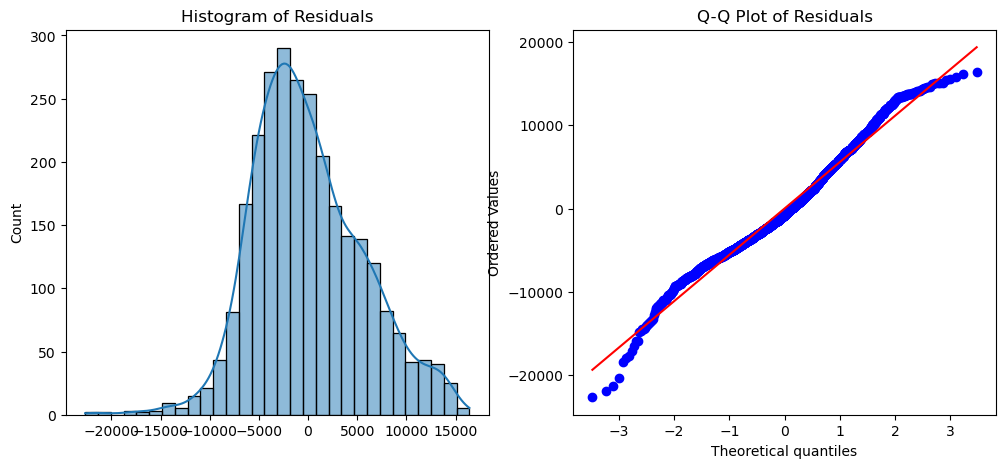

Shapiro-Wilk Test: Statistic=0.9830230797665768, p-value=1.5168621357897773e-17


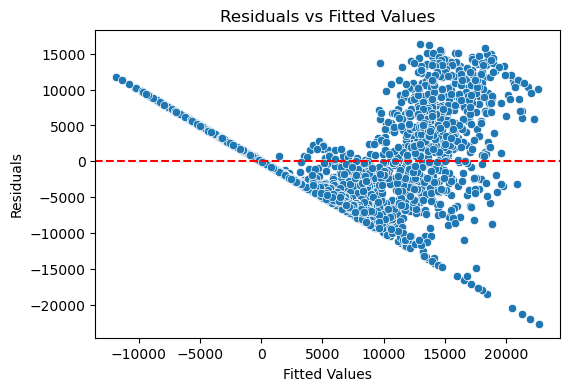

Breusch-Pagan Test: Statistic=553.2486180893586, p-value=2.2390857509865082e-113
Durbin-Watson Statistic: 1.408680818237951
           Feature       VIF
0  solar_noon_dist  1.242312
1      temperature  1.513666
2         wind_dir  1.338181
3       wind_speed  2.137908
4        sky_cover  1.358675
5       visibility  1.189688
6         humidity  1.606344
7   avg_wind_speed  1.937203
8     avg_pressure  1.491845


In [48]:
df_cleaned = solar1.drop(index=influential_points)

# Separate features and target again
X_clean = df_cleaned.drop(columns=['power_generated'])
y_clean = df_cleaned['power_generated']

# Add constant
X_clean_const = sm.add_constant(X_clean)

# Refit the model
model2 = sm.OLS(y_clean, X_clean_const).fit()

# Predict and compute MSE
y_pred_clean = model2.predict(X_clean_const)
mse2 = mean_squared_error(y_clean, y_pred_clean)
r2_clean = r2_score(y_clean, y_pred_clean)

# Output model summary and RMSE
print(model2.summary())
print(f"RMSE: {np.sqrt(mse2)}")
print(f"R-squared Score: {r2_clean}")

# Normality Check
residuals = model2.resid
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(residuals, kde=True, bins=30)
plt.title("Histogram of Residuals")
plt.subplot(1,2,2)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

# Shapiro-Wilk test
shapiro_test = stats.shapiro(residuals)
print(f"Shapiro-Wilk Test: Statistic={shapiro_test.statistic}, p-value={shapiro_test.pvalue}")

# Homoscedasticity Test
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred_clean, y=residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()

bp_test = het_breuschpagan(residuals, X_clean_const)
print(f"Breusch-Pagan Test: Statistic={bp_test[0]}, p-value={bp_test[1]}")

# Autocorrelation Check
dw_stat = durbin_watson(residuals)
print(f"Durbin-Watson Statistic: {dw_stat}")

# Variance Inflation Factor (VIF) Calculation
vif_data = pd.DataFrame()
vif_data["Feature"] = X_clean.columns
vif_data["VIF"] = [variance_inflation_factor(X_clean_const.values, i) for i in range(1, X_clean_const.shape[1])]
print(vif_data)

In [49]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
import scipy.stats as stats
from statsmodels.stats.stattools import durbin_watson

In [50]:
# Remove influential rows
df_cleaned = solar1.drop(index=influential_points)

In [51]:
# Separate features and target again
X_clean = df_cleaned.drop(columns=['power_generated'])
y_clean = df_cleaned['power_generated']

In [52]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

In [53]:
# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}

In [54]:
# Train Gradient Boosting Model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_clean, y_clean)

GradientBoostingRegressor(random_state=42)

In [91]:
# Perform Grid Search
gb_model = GradientBoostingRegressor(random_state=42)
grid_search = GridSearchCV(gb_model, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

In [92]:
# Best model from grid search
best_gb_model = grid_search.best_estimator_

In [93]:
# Predict and compute metrics
y_pred_gb = best_gb_model.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

In [58]:
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Gradient Boosting RMSE (Tuned): {np.sqrt(mse_gb)}")
print(f"Gradient Boosting R-squared Score (Tuned): {r2_gb}")

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Gradient Boosting RMSE (Tuned): 2958.68018086549
Gradient Boosting R-squared Score (Tuned): 0.877486460063475


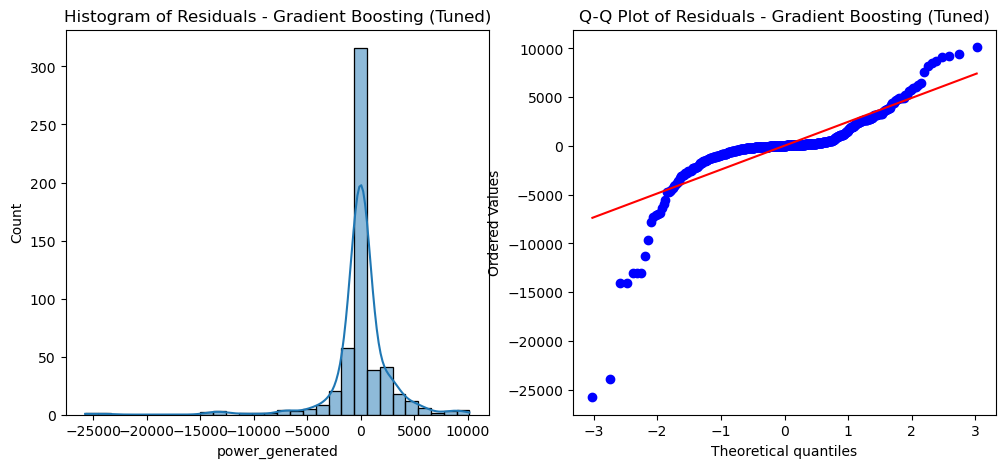

In [59]:
# Residual Analysis
residuals_gb = y_test - y_pred_gb
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(residuals_gb, kde=True, bins=30)
plt.title("Histogram of Residuals - Gradient Boosting (Tuned)")
plt.subplot(1,2,2)
stats.probplot(residuals_gb, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals - Gradient Boosting (Tuned)")
plt.show()

In [60]:
# Autocorrelation Check
dw_stat_gb = durbin_watson(residuals_gb)
print(f"Durbin-Watson Statistic (Gradient Boosting Tuned): {dw_stat_gb}")

Durbin-Watson Statistic (Gradient Boosting Tuned): 1.9409730573943067


In [61]:
!pip install shap
import shap

In [62]:
import shap

In [63]:
# Initialize SHAP explainer
explainer = shap.Explainer(best_gb_model, X_train)
shap_values = explainer(X_train)

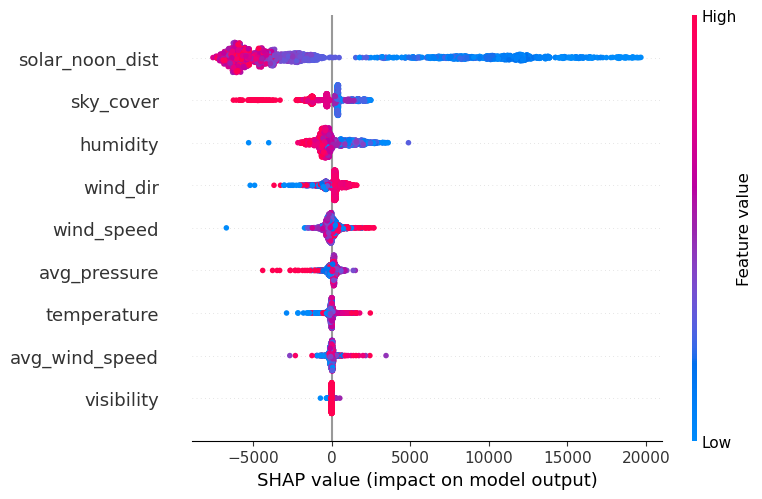

In [64]:
# Feature importance plot
shap.summary_plot(shap_values, X_train)

In [65]:
# Calculate mean absolute SHAP values for feature importance
shap_importance = np.abs(shap_values.values).mean(axis=0)
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'SHAP Importance': shap_importance})
feature_importance = feature_importance.sort_values(by='SHAP Importance', ascending=False)

In [66]:
# Select important features based on a threshold (e.g., top N features)
selected_features = feature_importance['Feature'][:7]  # Keep top 7 important features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [67]:
# Retrain Gradient Boosting model with selected features
new_gb_model_selected = GradientBoostingRegressor()
new_gb_model_selected.fit(X_train_selected, y_train)

GradientBoostingRegressor()

In [68]:
from sklearn.metrics import mean_absolute_error

In [69]:
# Evaluate new model
y_pred_selected = new_gb_model_selected.predict(X_test_selected)
mse_selected = mean_squared_error(y_test, y_pred_selected)
r2_selected = r2_score(y_test, y_pred_selected)
dw_selected = durbin_watson(y_test - y_pred_selected)
mae_selected = mean_absolute_error(y_test, y_pred_selected)

In [70]:
# Print updated evaluation metrics
print("Gradient Boosting Model with Feature Selection")
print("-------------------------------------------")
print(f"RMSE = {np.sqrt(mse_selected)}, R^2 = {r2_selected}, DW = {dw_selected}, MAE = {mae_selected}")


Gradient Boosting Model with Feature Selection
-------------------------------------------
RMSE = 3005.0672083208347, R^2 = 0.8736147410947821, DW = 1.9504582944590392, MAE = 1468.9188625954089


In [71]:
import pickle

# Save the trained model
with open("gradient_boosting_model.pkl", "wb") as file:
    pickle.dump(new_gb_model_selected, file)

print("Model saved successfully as 'gradient_boosting_model.pkl'")


Model saved successfully as 'gradient_boosting_model.pkl'


In [113]:
import pickle
with open("gradient_boosting_model.pkl", "wb") as file:
    pickle.dump(new_gb_model_selected, file)
print("Model saved successfully as 'gradient_boosting_model.pkl'")

Model saved successfully as 'gradient_boosting_model.pkl'


In [115]:
print(X_train.columns)

Index(['solar_noon_dist', 'temperature', 'wind_dir', 'wind_speed', 'sky_cover',
       'visibility', 'humidity', 'avg_wind_speed', 'avg_pressure'],
      dtype='object')
